# Plotting timeseries of Arctic Regional atmospheric circulation

* **Description**: Plots historical and future timeseries by month and region
* **Input data**: Processed rufmod and cesm2-le regional total netcdf files
* **Output data**: Timeseries plots in png format
* **Creator**: Alice DuVivier
* **Date**: August 2021

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pop_tools
from datetime import timedelta
import glob
import dask
from matplotlib.gridspec import GridSpec
import pandas as pd


## Read in the processed data

This reads in pre-processed regional average atmospheric circulation for the Arctic: 70-90N over ocean.


In [23]:
# list the variables to load
var_in = 'PSL'

# PSL and U10

In [24]:
# set base directory where all data live
data_dir = '/glade/p/cgd/ppc/duvivier/cesm2_arctic_cyclones/DATA/regional_timeseries/'

# set file names
fin_le = 'CESM2-LE_all_transient_regional_avg_'+var_in
fin_rufmod = 'rufmod_all_transient_regional_avg_'+var_in

In [25]:
ds_le = xr.open_dataset(data_dir+fin_le+'.nc',decode_times=True)
ds_rufmod = xr.open_dataset(data_dir+fin_rufmod+'.nc',decode_times=True)

In [26]:
# double check that year/month is not shifted incorrectly
ds_le.coords['time.month']
ds_rufmod.coords['time.month']

<xarray.DataArray 'month' (time: 1812)>
array([ 1,  2,  3, ..., 10, 11, 12])
Coordinates:
  * time     (time) object 1950-01-16 12:00:00 ... 2100-12-16 12:00:00

In [27]:
print(ds_le.units)
print(ds_le.longname)

total_le = ds_le['regional_totals']
total_rufmod = ds_rufmod['regional_totals']

Pa
Sea level pressure 70-90N


In [28]:
# if we're looking at sea level pressure, divide by 100 to get hPa
if var_in == 'PSL':
    total_le = total_le/100.
    total_rufmod = total_rufmod/100.

In [29]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
len(month_names)

12

### Plotting!

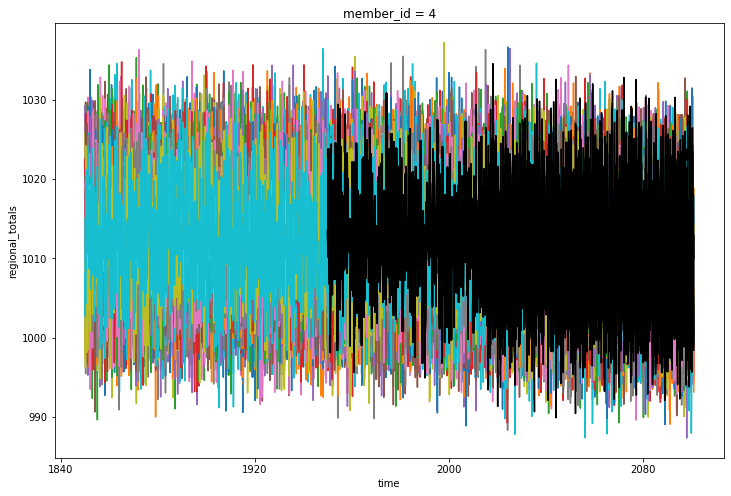

In [30]:
#Plot rough version just to check
import nc_time_axis
# Setup the figure
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)

#CESM2-LE
# Loop through and plot each member_id all months in 251 years
for member_id in total_le.member_id.values:
    total_le.sel(member_id=member_id).plot(ax=ax)
#rufmod
# Loop through and plot each member_id all months overlay in black
for member_id in total_rufmod.member_id.values:
    total_rufmod.sel(member_id=member_id).plot(ax=ax,color='black')

In [31]:
#set some labeling info for plots
if var_in == 'PSL':
   out_tag = 'PSL'
   label = 'sea level pressure'
   units = '(hPa)'
else:
   out_tag = 'U10'
   label = '10m wind speed'
   units = '(m/s)'

In [32]:
# set x arrays against which to plot
xarr_le = total_le.coords['time.year'][(total_le.coords['time.month']==1)]
xarr_rufmod = total_rufmod.coords['time.year'][(total_rufmod.coords['time.month']==1)]

In [33]:
# Use .groupby('time.month') to organize the data into months
# then use .groups to extract the indices for each month
month_idxs_le=total_le.groupby('time.month').groups
month_idxs_rufmod=total_rufmod.groupby('time.month').groups

In [34]:
jan_indexes = month_idxs_le[1]  # start indexing with 1, not 0
len(jan_indexes)
total_le.time[month_idxs_le[1]]

<xarray.DataArray 'time' (time: 251)>
array([cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1851, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1852, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2098, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2099, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2100, 1, 16, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2100-01-16 12:00:00

In [35]:
jan_data_le = total_le.isel(time=month_idxs_le[1])
jan_data_rufmod = total_rufmod.isel(time=month_idxs_rufmod[1])

In [36]:
# Note that the shapes are not the same. Member indices and time are flipped.
print(jan_data_le.shape)
print(jan_data_rufmod.shape)

(50, 251)
(151, 5)


In [37]:
# test that we're looking at correct indices
for mm in months:
    mstr = month_names[mm-1]
    print('Testing indices for month '+mstr)
    data_temp = total_le.isel(time=month_idxs_le[mm]).transpose()
    print(data_temp.shape)
    data_temp = total_rufmod.isel(time=month_idxs_rufmod[mm])
    print(data_temp.shape)



Testing indices for month Jan
(251, 50)
(151, 5)
Testing indices for month Feb
(251, 50)
(151, 5)
Testing indices for month Mar
(251, 50)
(151, 5)
Testing indices for month Apr
(251, 50)
(151, 5)
Testing indices for month May
(251, 50)
(151, 5)
Testing indices for month Jun
(251, 50)
(151, 5)
Testing indices for month Jul
(251, 50)
(151, 5)
Testing indices for month Aug
(251, 50)
(151, 5)
Testing indices for month Sep
(251, 50)
(151, 5)
Testing indices for month Oct
(251, 50)
(151, 5)
Testing indices for month Nov
(251, 50)
(151, 5)
Testing indices for month Dec
(251, 50)
(151, 5)


Plotting timeseries for region 70-90N and month Jan
Plotting timeseries for region 70-90N and month Feb
Plotting timeseries for region 70-90N and month Mar
Plotting timeseries for region 70-90N and month Apr
Plotting timeseries for region 70-90N and month May
Plotting timeseries for region 70-90N and month Jun
Plotting timeseries for region 70-90N and month Jul
Plotting timeseries for region 70-90N and month Aug
Plotting timeseries for region 70-90N and month Sep
Plotting timeseries for region 70-90N and month Oct
Plotting timeseries for region 70-90N and month Nov
Plotting timeseries for region 70-90N and month Dec


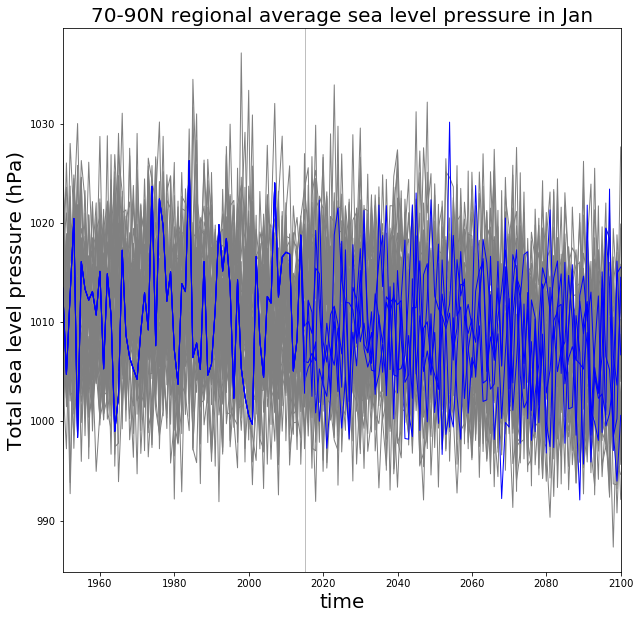

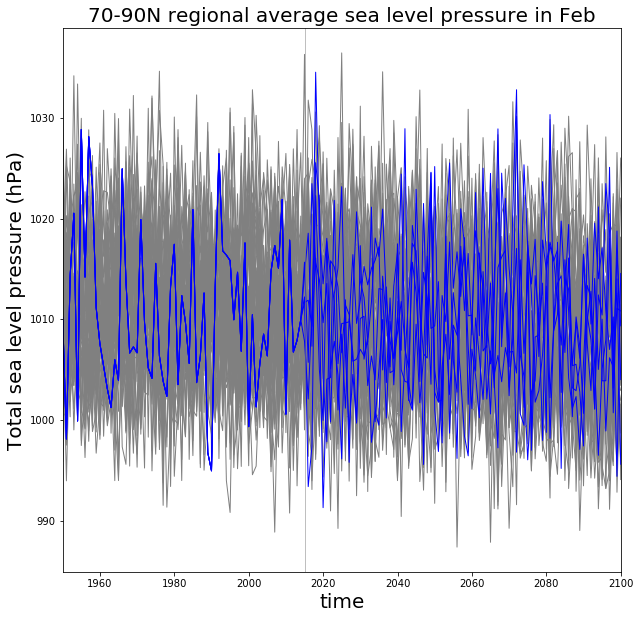

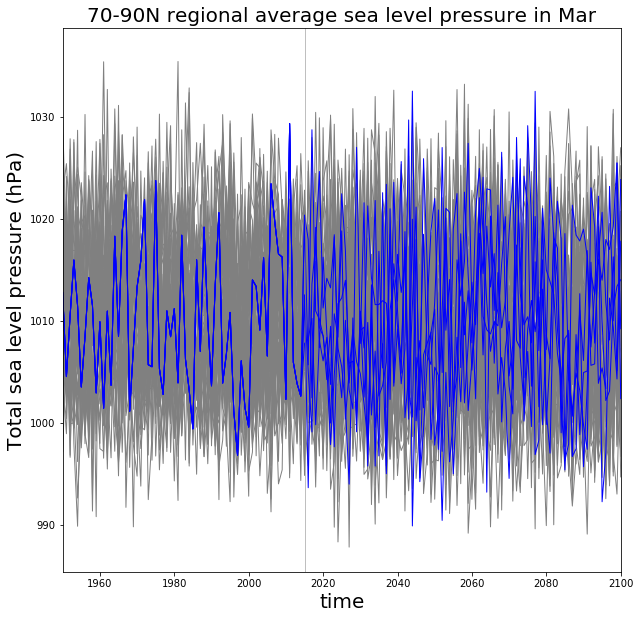

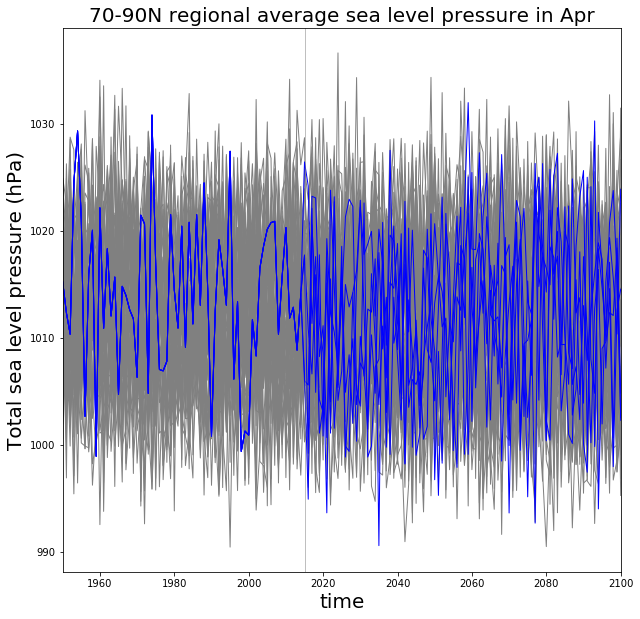

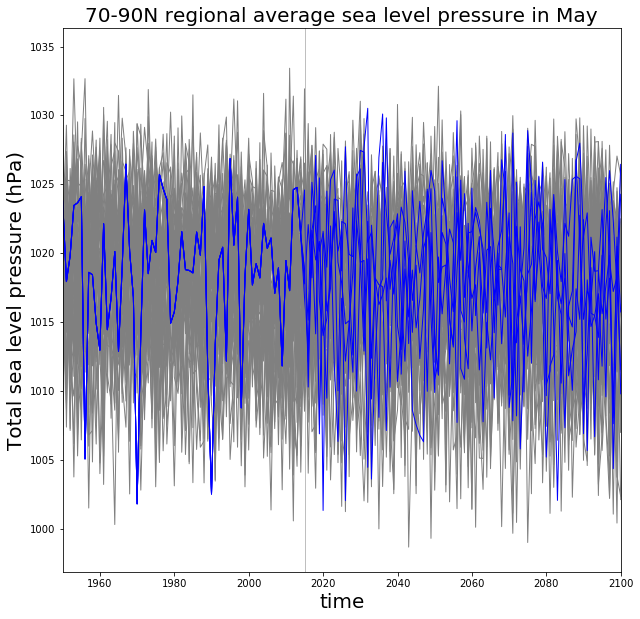

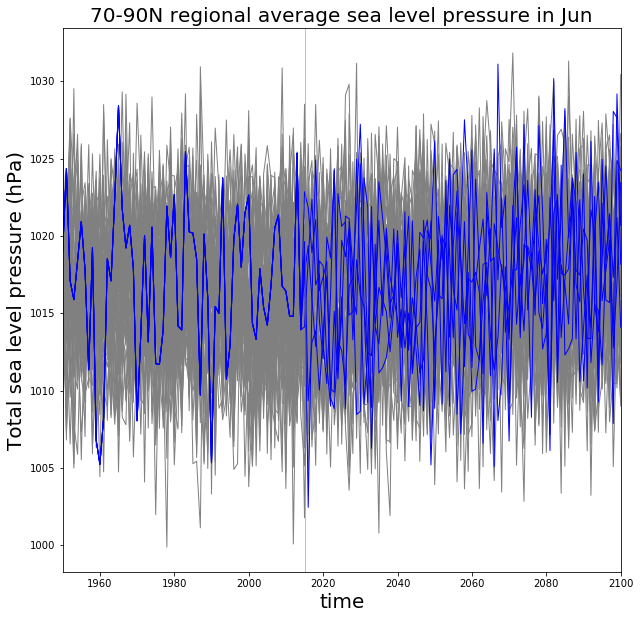

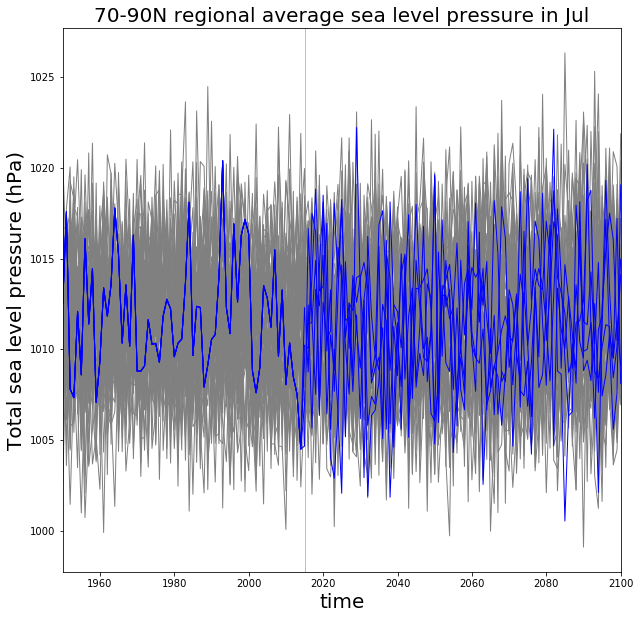

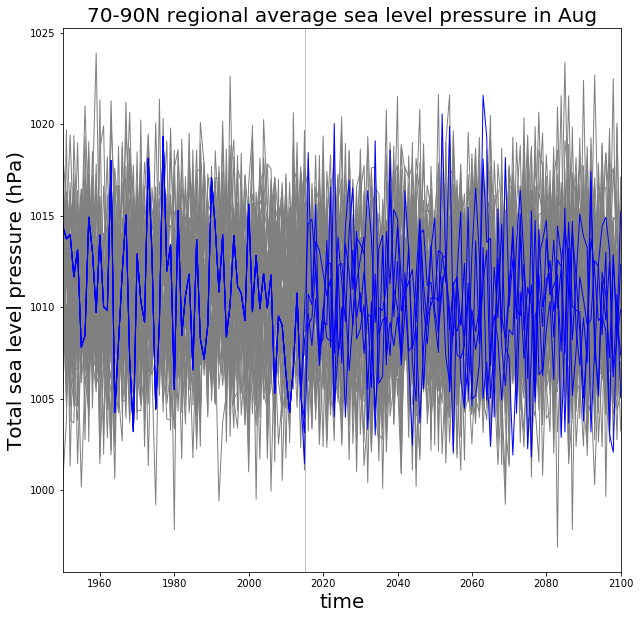

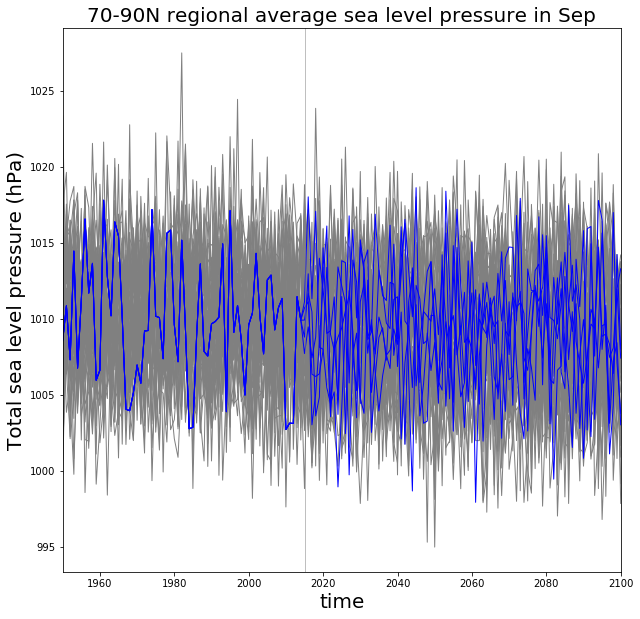

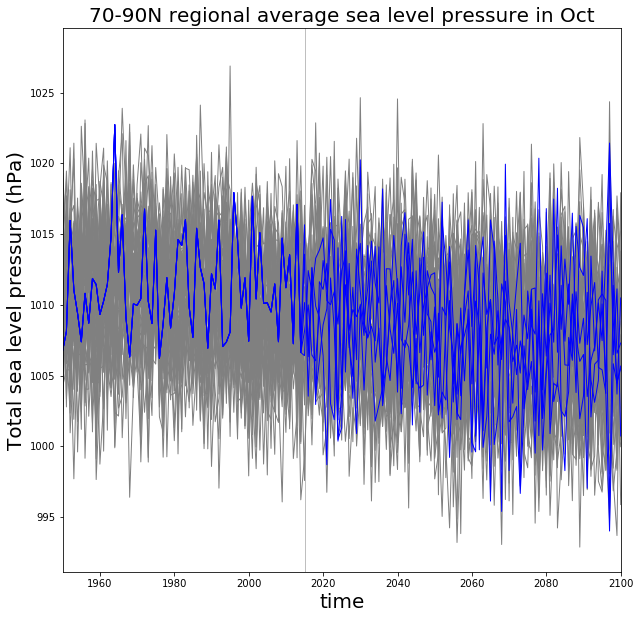

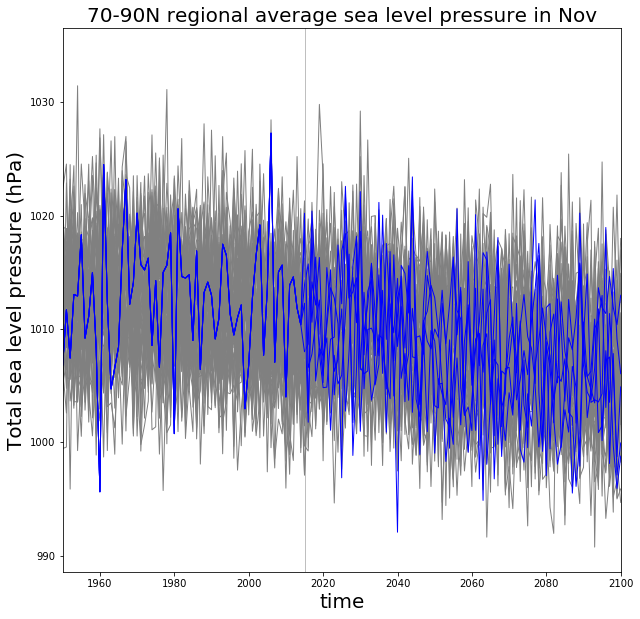

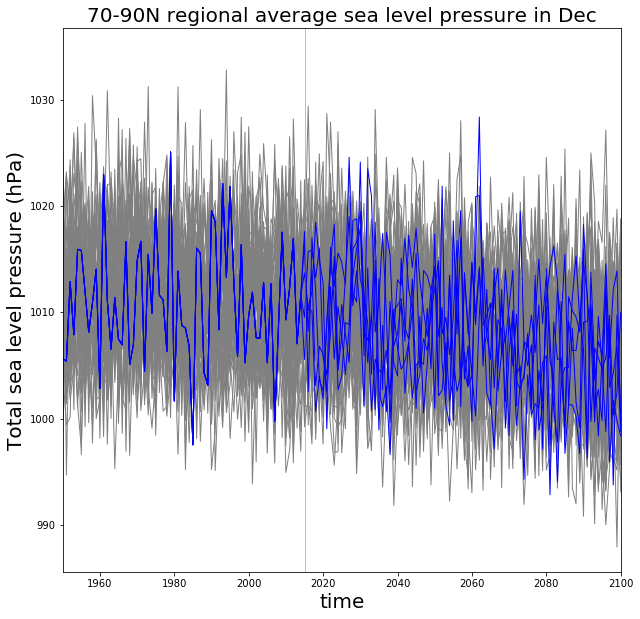

In [38]:
#Plot regional ice area time series

for mm in months:
    mstr = month_names[mm-1]
    print('Plotting timeseries for region 70-90N and month '+mstr)
    fout = 'total_cesm2_le_and_rufmod_'+out_tag+'_70-90N_'+str(mm) 
    # CESM2-LE: subset the data for this month and flip the coordinates
    data_temp_le = total_le.isel(time=month_idxs_le[mm]).transpose()
    # rufmod: subset the data for this month but DON'T flip the coordinates
    data_temp_rufmod = total_rufmod.isel(time=month_idxs_rufmod[mm])
    
    # Actually plot figure now
    fig = plt.figure(figsize=(10,10))
    fig = plt.plot(xarr_le,data_temp_le,label="CESM2-LE",color='grey',linestyle='-', linewidth=1)
    fig = plt.plot(xarr_rufmod,data_temp_rufmod,label="rufmod",color='blue',linestyle='-', linewidth=1)    
    fig = plt.title('70-90N regional average '+label+' in '+mstr,fontsize=20)
    fig = plt.xlabel('time',fontsize=20)
    fig = plt.xlim([1950,2100])
    fig = plt.axvline(x=2015, color='grey', linestyle='-', linewidth=0.5)
    fig = plt.ylabel('Total '+label+' '+units,fontsize=20)
    #fig = plt.ylim([0,40000])
    #plt.legend(fontsize=15)
    # save figure:
    #fig = plt.savefig(fout+'.png', bbox_inches='tight', dpi=200)


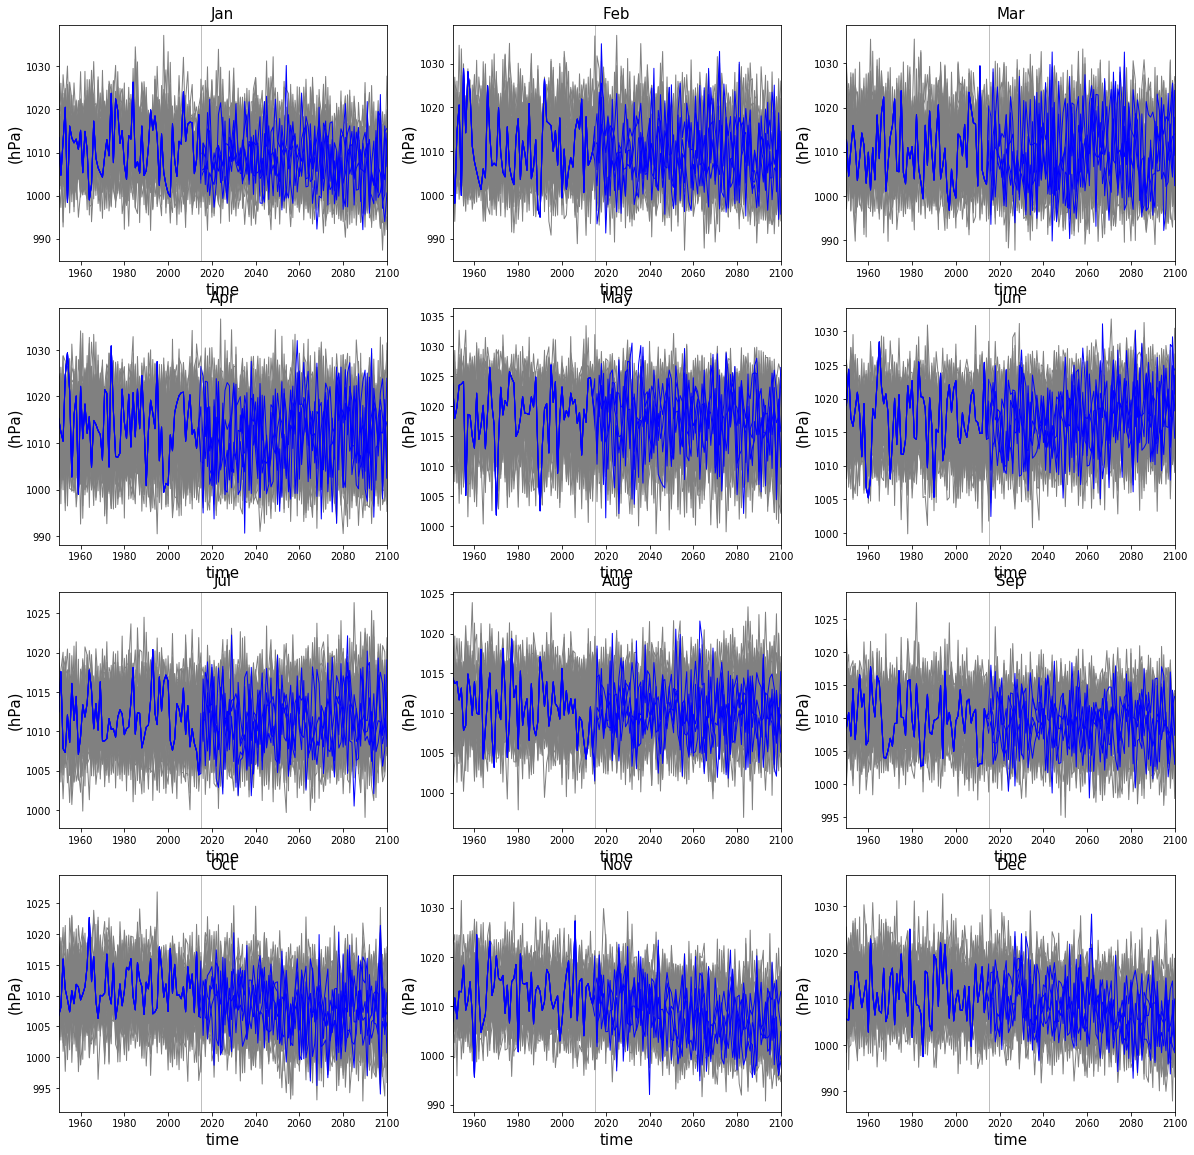

In [39]:
# create figure
fig = plt.figure(figsize=(20,20))
# now loop through months to create subpanels
fout = 'total_'+out_tag+'_70-90N_all_months'

for mm in months:
    # CESM2-LE: subset the data for this month and flip the coordinates
    data_temp_le = total_le.isel(time=month_idxs_le[mm]).transpose()
    # rufmod: subset the data for this month but DON'T flip the coordinates
    data_temp_rufmod = total_rufmod.isel(time=month_idxs_rufmod[mm])
    
    # Make subplot - note it's nrow x ncol x index (starting upper left)
    ax = fig.add_subplot(4,3,mm)
    
    ax.plot(xarr_le,data_temp_le,label="CESM2-LE",color='grey',linestyle='-', linewidth=1)
    ax.plot(xarr_rufmod,data_temp_rufmod,label="rufmod",color='blue',linestyle='-', linewidth=1)
    plt.title(month_names[mm-1],fontsize=15)
    plt.xlabel('time',fontsize=15)
    plt.xlim([1950,2100])
    plt.axvline(x=2015, color='grey', linestyle='-', linewidth=0.5)
    plt.ylabel(units,fontsize=15)
    #plt.ylim([0,40000])

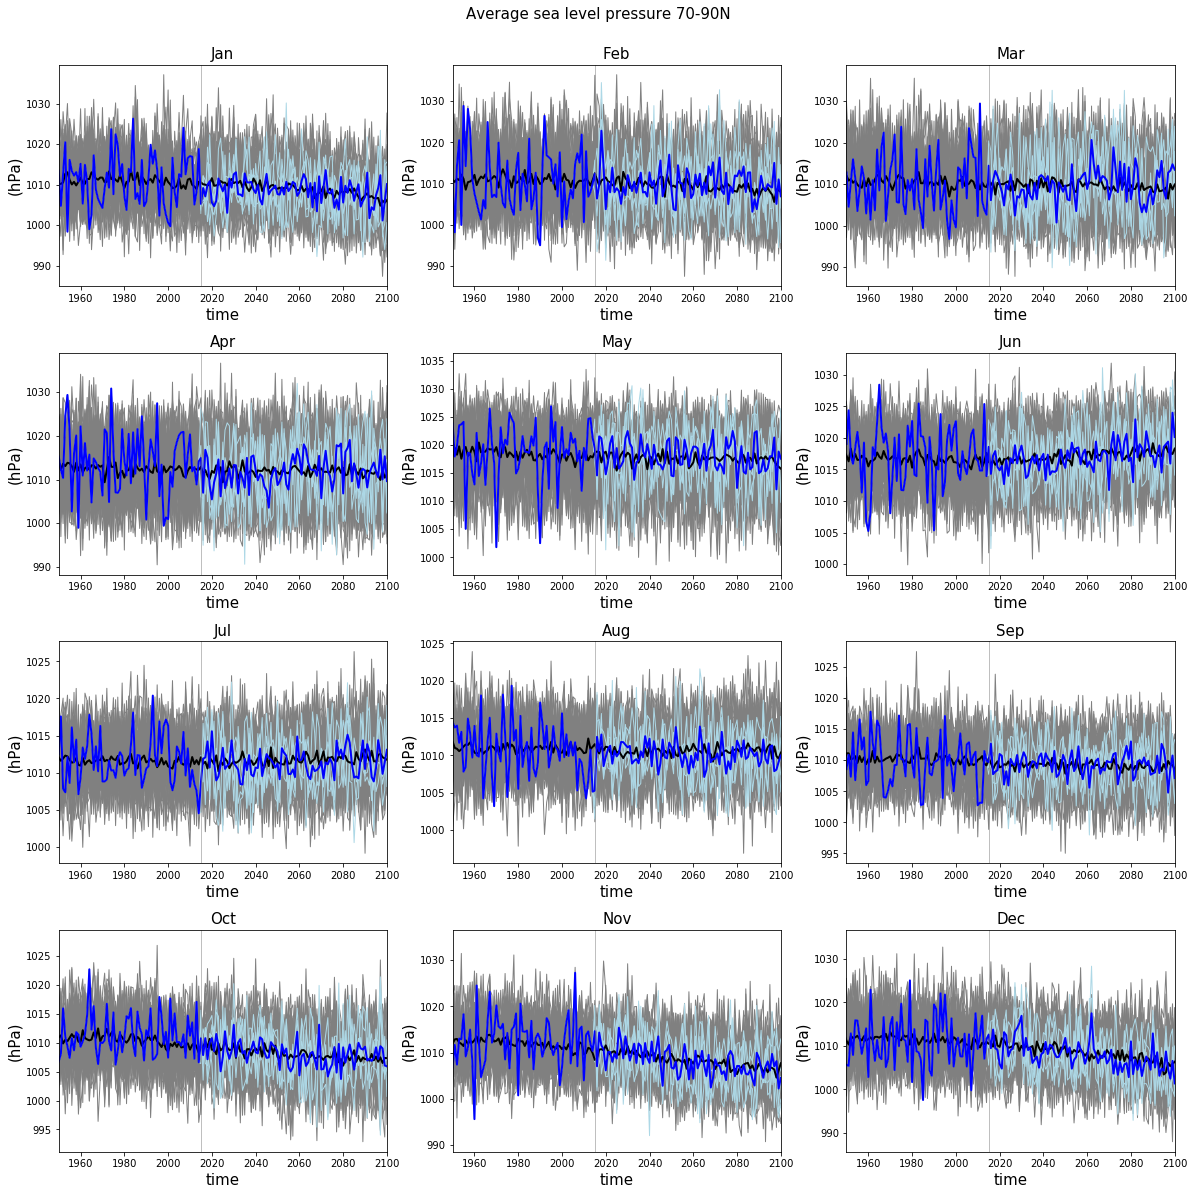

In [40]:
# create figure
fig = plt.figure(figsize=(20,20))
# now loop through months to create subpanels
fout = 'average_'+out_tag+'_70-90N_all_months'

for mm in months:
    # CESM2-LE: subset the data for this month and flip the coordinates
    data_temp_le = total_le.isel(time=month_idxs_le[mm]).transpose()
    mean_le = data_temp_le.mean(dim='member_id')
    # rufmod: subset the data for this month but DON'T flip the coordinates
    data_temp_rufmod = total_rufmod.isel(time=month_idxs_rufmod[mm])
    mean_rufmod = data_temp_rufmod.mean(dim='member_id')
    
    # Make subplot - note it's nrow x ncol x index (starting upper left)
    ax = fig.add_subplot(4,3,mm)
    ax.plot(xarr_le,data_temp_le,label="CESM2-LE",color='grey',linestyle='-', linewidth=1)
    ax.plot(xarr_rufmod,data_temp_rufmod,label="rufmod",color='lightblue',linestyle='-', linewidth=1)
    ax.plot(xarr_le,mean_le,label="CESM2-LE ens mean",color='black',linestyle='-',linewidth=2)
    ax.plot(xarr_rufmod,mean_rufmod,label="rufmod ens mean",color='blue',linestyle='-',linewidth=2)
    
    plt.title(month_names[mm-1],fontsize=15)
    plt.xlabel('time',fontsize=15)
    plt.xlim([1950,2100])
    plt.axvline(x=2015, color='grey', linestyle='-', linewidth=0.5)
    plt.ylabel(units,fontsize=15)
    #plt.ylim([0,40000])
    
# Finalize figure and save
fig.suptitle('Average '+label+' 70-90N',fontsize=15, y=0.92)  
fig.subplots_adjust(hspace=0.3)
fig = plt.savefig(fout+'.png', bbox_inches='tight', dpi=200)